In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns

In [2]:
#Creating the data
full_data = pd.read_csv("AttyFeeStudy2007.csv")
full_data_indexed = pd.read_csv("AttyFeeStudy2007.csv", index_col = "XNameCorp")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


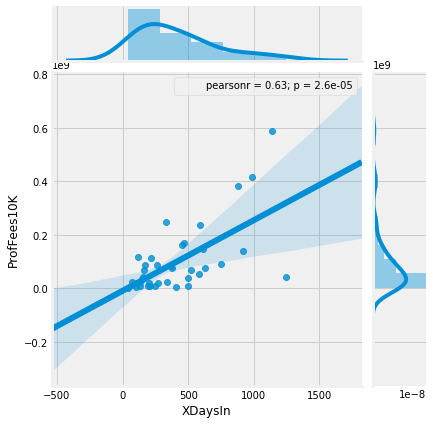

In [3]:
#Looking at relationship between professional fees reported in 10Ks and days in bankruptcy. 
a = full_data[["XDaysIn", "ProfFees10K"]]
b = a.dropna()
sns.jointplot(x="XDaysIn",y="ProfFees10K",data=b, kind="reg")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


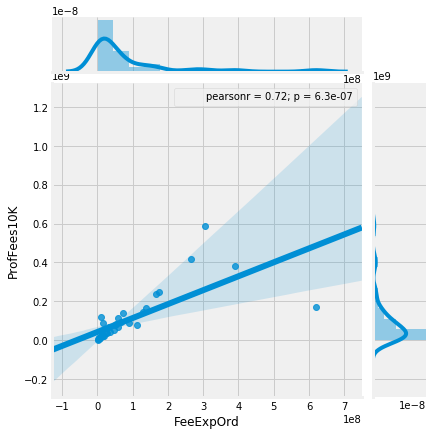

In [4]:
#Aanlyzing relationship between professional fees reported in 10Ks and amount of fees and expenses awarded by the court
c = full_data[["FeeExpOrd", "ProfFees10K"]]
d = c.dropna()
sns.jointplot(x="FeeExpOrd",y="ProfFees10K",data=d, kind="reg")

In [5]:
import statsmodels.formula.api as sm
d["Ones"] = np.ones(d.shape[0])
regressor_OLS = sm.OLS(endog = d["ProfFees10K"], exog = d[["FeeExpOrd", "Ones"]]).fit()
regressor_OLS.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ProfFees10K   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     36.80
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           6.31e-07
Time:                        14:45:09   Log-Likelihood:                -729.54
No. Observations:                  37   AIC:                             1463.
Df Residuals:                      35   BIC:                             1466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FeeExpOrd      0.7169      0.118      6.066      0.000       0.477       0.957
Ones        4.171e+07   1.79e+07      2.337      0.025    5.47e+06     7.8e+07
==============================================================================
Omnibus:                       16.929   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.279
Skew:                           0.405   Prob(JB):                     2.24e-18
Kurtosis:                      10.216   Cond. No.                     1.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
#Creating dataset containing desired dependent variables and independent variable (FeeExpOrd)
first_try_data = full_data[["XNameCorp", "AssetsScheduled", "LiabScheduled", "AssetLiab", "XnumEmplBefore", 
                           "Sales", "XShop", "XDaysIn", "DENYOther", "XPrepackaged", "JudgeType",
                           "FeeCommi", "Role", "FeeExpOrd"]]
X = first_try_data.iloc[: , 1:12]
y = first_try_data["FeeExpOrd"]

In [7]:
#Encoding categorical data: XShop
def encode_XShop(array):
    vals = []
    for x in array:
        if x == "Yes":
            vals.append(1)
        else:
            vals.append(0)
    return np.array(vals)

encoded_XShop = encode_XShop(X["XShop"])
X["Encoded_XShop"] = encoded_XShop

In [8]:
#Encoding categorical data: DENYOther, Other will be excluded (default)
def encode_DENYOther(array):
    DE_vals = []
    NY_vals = []
    for x in array:
        if x == "DE":
            DE_vals.append(1)
            NY_vals.append(0)
        elif x == "NY":
            DE_vals.append(0)
            NY_vals.append(1)
        else:
            DE_vals.append(0)
            NY_vals.append(0)
    return np.array(DE_vals), np.array(NY_vals)

encoded_DE = encode_DENYOther(X["DENYOther"])[0]
encoded_NY = encode_DENYOther(X["DENYOther"])[1]
X["Encoded_DE"] = encoded_DE 
X["Encoded_NY"] = encoded_NY

In [9]:
#Encoding categorical data: XPrepackaged, no will be excluded (default)
def encode_XPrepackaged(array):
    yes_vals = []
    preneg_vals = []
    for x in array:
        if x == "yes":
            yes_vals.append(1)
            preneg_vals.append(0)
        elif x == "prenegotiated":
            yes_vals.append(0)
            preneg_vals.append(1)
        else:
            yes_vals.append(0)
            preneg_vals.append(0)
    return np.array(yes_vals), np.array(preneg_vals)

encoded_yes = encode_XPrepackaged(X["XPrepackaged"])[0]
encoded_preneg = encode_XPrepackaged(X["XPrepackaged"])[1]
X["Encoded_Prepackaged_yes"] = encoded_yes
X["Encoded_Prepackaged_prenegotiated"] = encoded_preneg

In [10]:
#Encoding categorical data: FeeCommi, no will be excluded (default)
def encode_FeeCommi(array):
    yes_vals = []
    for x in array:
        if x == "yes":
            yes_vals.append(1)
        else:
            yes_vals.append(0)
    return np.array(yes_vals)
encoded_FeeCommi = encode_FeeCommi(X["FeeCommi"])
X["Encoded_FeeCommi"] = encoded_FeeCommi

In [11]:
#Creating final dataframe of independent variables, including constant
X2 = X.drop(labels=["LiabScheduled", "AssetLiab", "XShop", "DENYOther", "XPrepackaged", "JudgeType", "FeeCommi"], axis=1)
X2["Ones"] = np.ones(102)
X2["Sales"][23] = 100789000000

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
Encoded_DE

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     50.48
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           8.58e-33
Time:                        14:45:32   Log-Likelihood:                -1946.9
No. Observations:                 102   AIC:                             3916.
Df Residuals:                      91   BIC:                             3945.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
AssetsScheduled                    3998.5626    475.118      8.416      0.000    3054.798    4942.327
XnumEmplBefore                     -401.9929    195.718     -2.054      0.043    -790.763     -13.222
Sales                                 0.0049      0.001      8.464      0.000       0.004       0.006
XDaysIn                            9.882e+04   1.76e+04      5.627      0.000    6.39e+04    1.34e+05
Encoded_XShop                      6.339e+06   1.33e+07      0.477      0.634   -2.01e+07    3.27e+07
Encoded_DE                        -8.171e+06   1.53e+07     -0.534      0.594   -3.86e+07    2.22e+07
Encoded_NY                        -5.172e+06   1.33e+07     -0.388      0.699   -3.17e+07    2.13e+07
Encoded_Prepackaged_yes            2.506e+07   2.75e+07      0.911      0.365   -2.96e+07    7.97e+07
Encoded_Prepackaged_prenegotiated  3.492e+06   1.26e+07      0.277      0.783   -2.16e+07    2.86e+07
Encoded_FeeCommi                   1.283e+07   1.49e+07      0.861      0.391   -1.68e+07    4.24e+07
Ones                              -3.037e+07   1.28e+07     -2.377      0.020   -5.58e+07   -4.99e+06
==============================================================================
Omnibus:                       48.546   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              414.467
Skew:                           1.205   Prob(JB):                     9.99e-91
Kurtosis:                      12.577   Cond. No.                     7.02e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X_opt = X2.drop("Encoded_Prepackaged_prenegotiated", axis = 1)
regressor_OLS2 = sm.OLS(endog = y, exog = X_opt.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     56.65
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           1.15e-33
Time:                        14:45:47   Log-Likelihood:                -1947.0
No. Observations:                 102   AIC:                             3914.
Df Residuals:                      92   BIC:                             3940.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
AssetsScheduled          3998.7722    472.727      8.459      0.000    3059.895    4937.649
XnumEmplBefore           -406.3623    194.098     -2.094      0.039    -791.858     -20.866
Sales                       0.0049      0.001      8.508      0.000       0.004       0.006
XDaysIn                  9.678e+04   1.59e+04      6.103      0.000    6.53e+04    1.28e+05
Encoded_XShop            6.533e+06   1.32e+07      0.495      0.622   -1.97e+07    3.28e+07
Encoded_DE              -7.793e+06   1.52e+07     -0.514      0.608   -3.79e+07    2.23e+07
Encoded_NY              -4.411e+06    1.3e+07     -0.340      0.735   -3.02e+07    2.14e+07
Encoded_Prepackaged_yes  2.287e+07   2.62e+07      0.873      0.385   -2.92e+07    7.49e+07
Encoded_FeeCommi         1.261e+07   1.48e+07      0.852      0.397   -1.68e+07     4.2e+07
Ones                     -2.86e+07    1.1e+07     -2.601      0.011   -5.04e+07   -6.76e+06
==============================================================================
Omnibus:                       49.407   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.964
Skew:                           1.241   Prob(JB):                     2.87e-91
Kurtosis:                      12.589   Cond. No.                     6.57e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X_opt = X_opt.drop("Encoded_NY", axis = 1)
regressor_OLS2 = sm.OLS(endog = y, exog = X_opt.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     64.32
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           1.46e-34
Time:                        14:46:02   Log-Likelihood:                -1947.0
No. Observations:                 102   AIC:                             3912.
Df Residuals:                      93   BIC:                             3936.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
AssetsScheduled          3982.7519    468.123      8.508      0.000    3053.152    4912.352
XnumEmplBefore           -397.7211    191.505     -2.077      0.041    -778.012     -17.431
Sales                       0.0048      0.001      8.545      0.000       0.004       0.006
XDaysIn                  9.683e+04   1.58e+04      6.136      0.000    6.55e+04    1.28e+05
Encoded_XShop            5.203e+06   1.25e+07      0.415      0.679   -1.97e+07    3.01e+07
Encoded_DE              -5.244e+06   1.31e+07     -0.400      0.690   -3.13e+07    2.08e+07
Encoded_Prepackaged_yes  2.274e+07   2.61e+07      0.872      0.385   -2.91e+07    7.45e+07
Encoded_FeeCommi          1.26e+07   1.47e+07      0.855      0.395   -1.67e+07    4.19e+07
Ones                    -2.988e+07   1.03e+07     -2.907      0.005   -5.03e+07   -9.47e+06
==============================================================================
Omnibus:                       49.664   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.662
Skew:                           1.257   Prob(JB):                     2.46e-90
Kurtosis:                      12.528   Cond. No.                     6.57e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X_opt = X_opt.drop("Encoded_DE", axis = 1)
regressor_OLS2 = sm.OLS(endog = y, exog = X_opt.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     74.15
Date:                Mon, 09 Jul 2018   Prob (F-statistic):           1.76e-35
Time:                        14:44:43   Log-Likelihood:                -1947.1
No. Observations:                 102   AIC:                             3910.
Df Residuals:                      94   BIC:                             3931.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
AssetsScheduled          4015.4498    458.873      8.751      0.000    3104.347    4926.552
XnumEmplBefore           -394.1437    190.439     -2.070      0.041    -772.266     -16.022
Sales                       0.0049      0.001      8.657      0.000       0.004       0.006
XDaysIn                  9.726e+04   1.57e+04      6.206      0.000    6.61e+04    1.28e+05
Encoded_XShop            2.334e+06   1.03e+07      0.228      0.820    -1.8e+07    2.27e+07
Encoded_Prepackaged_yes  2.256e+07    2.6e+07      0.869      0.387    -2.9e+07    7.41e+07
Encoded_FeeCommi         1.241e+07   1.47e+07      0.847      0.399   -1.67e+07    4.15e+07
Ones                    -3.024e+07   1.02e+07     -2.966      0.004   -5.05e+07   -9.99e+06
==============================================================================
Omnibus:                       51.524   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.307
Skew:                           1.320   Prob(JB):                     4.92e-95
Kurtosis:                      12.758   Cond. No.                     6.57e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X_opt = X_opt.drop("Encoded_XShop", axis = 1)
regressor_OLS2 = sm.OLS(endog = y, exog = X_opt.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     74.14
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           1.77e-35
Time:                        14:46:07   Log-Likelihood:                -1947.1
No. Observations:                 102   AIC:                             3910.
Df Residuals:                      94   BIC:                             3931.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
AssetsScheduled          3996.8895    464.819      8.599      0.000    3073.981    4919.798
XnumEmplBefore           -393.3149    190.366     -2.066      0.042    -771.290     -15.340
Sales                       0.0049      0.001      8.694      0.000       0.004       0.006
XDaysIn                  9.739e+04   1.57e+04      6.221      0.000    6.63e+04    1.28e+05
Encoded_DE              -2.139e+06   1.07e+07     -0.200      0.842   -2.34e+07    1.91e+07
Encoded_Prepackaged_yes  2.331e+07   2.59e+07      0.899      0.371   -2.82e+07    7.48e+07
Encoded_FeeCommi         1.278e+07   1.47e+07      0.871      0.386   -1.63e+07    4.19e+07
Ones                    -2.818e+07   9.38e+06     -3.004      0.003   -4.68e+07   -9.55e+06
==============================================================================
Omnibus:                       51.381   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.285
Skew:                           1.313   Prob(JB):                     4.97e-95
Kurtosis:                      12.761   Cond. No.                     6.57e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X_opt = X_opt.drop("Encoded_FeeCommi", axis = 1)
regressor_OLS2 = sm.OLS(endog = y, exog = X_opt.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     86.59
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           2.64e-36
Time:                        14:46:13   Log-Likelihood:                -1947.5
No. Observations:                 102   AIC:                             3909.
Df Residuals:                      95   BIC:                             3927.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
AssetsScheduled          4123.7949    440.855      9.354      0.000    3248.587    4999.003
XnumEmplBefore           -353.2400    184.493     -1.915      0.059    -719.504      13.024
Sales                       0.0049      0.001      8.839      0.000       0.004       0.006
XDaysIn                  1.006e+05   1.52e+04      6.612      0.000    7.04e+04    1.31e+05
Encoded_DE              -1.586e+06   1.07e+07     -0.149      0.882   -2.28e+07    1.96e+07
Encoded_Prepackaged_yes  2.274e+07   2.59e+07      0.878      0.382   -2.87e+07    7.41e+07
Ones                    -2.832e+07   9.37e+06     -3.023      0.003   -4.69e+07   -9.72e+06
==============================================================================
Omnibus:                       56.406   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.262
Skew:                           1.490   Prob(JB):                    5.73e-107
Kurtosis:                      13.307   Cond. No.                     6.56e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X_opt = X_opt.drop("Encoded_Prepackaged_yes", axis = 1)
regressor_OLS2 = sm.OLS(endog = y, exog = X_opt.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     104.0
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           3.59e-37
Time:                        14:46:13   Log-Likelihood:                -1948.0
No. Observations:                 102   AIC:                             3908.
Df Residuals:                      96   BIC:                             3924.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
AssetsScheduled  4111.6848    440.114      9.342      0.000    3238.066    4985.303
XnumEmplBefore   -353.2159    184.273     -1.917      0.058    -718.994      12.562
Sales               0.0049      0.001      8.869      0.000       0.004       0.006
XDaysIn          9.749e+04   1.48e+04      6.594      0.000    6.81e+04    1.27e+05
Encoded_DE      -1.051e+06   1.06e+07     -0.099      0.922   -2.22e+07    2.01e+07
Ones            -2.621e+07   9.04e+06     -2.898      0.005   -4.42e+07   -8.25e+06
==============================================================================
Omnibus:                       57.940   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.747
Skew:                           1.541   Prob(JB):                    1.24e-111
Kurtosis:                      13.520   Cond. No.                     3.02e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X_opt = X_opt.drop("XnumEmplBefore", axis = 1)
regressor_OLS2 = sm.OLS(endog = y, exog = X_opt.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     125.6
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           1.80e-37
Time:                        14:46:15   Log-Likelihood:                -1949.9
No. Observations:                 102   AIC:                             3910.
Df Residuals:                      97   BIC:                             3923.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
AssetsScheduled  4078.4068    445.792      9.149      0.000    3193.633    4963.180
Sales               0.0046      0.001      8.592      0.000       0.004       0.006
XDaysIn          9.326e+04   1.48e+04      6.293      0.000    6.39e+04    1.23e+05
Encoded_DE      -9.679e+05   1.08e+07     -0.090      0.929   -2.24e+07    2.04e+07
Ones             -2.77e+07   9.13e+06     -3.033      0.003   -4.58e+07   -9.57e+06
==============================================================================
Omnibus:                       58.541   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.476
Skew:                           1.568   Prob(JB):                    1.42e-111
Kurtosis:                      13.501   Cond. No.                     3.02e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X_opt["XnumEmplBefore"] = X2["XnumEmplBefore"]
X_opt["LiabScheduled"] = X["LiabScheduled"]
X_opt["AssetsScheduled"] = X2["AssetsScheduled"]
regressor_OLS2 = sm.OLS(endog = y, exog = X_opt.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     89.32
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           7.64e-37
Time:                        14:46:15   Log-Likelihood:                -1946.2
No. Observations:                 102   AIC:                             3906.
Df Residuals:                      95   BIC:                             3925.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
AssetsScheduled  5403.8745    831.292      6.501      0.000    3753.551    7054.198
Sales               0.0048      0.001      8.683      0.000       0.004       0.006
XDaysIn          9.829e+04   1.46e+04      6.725      0.000    6.93e+04    1.27e+05
Encoded_DE      -3.343e+06   1.06e+07     -0.316      0.753   -2.44e+07    1.77e+07
Ones            -2.332e+07   9.08e+06     -2.569      0.012   -4.13e+07    -5.3e+06
XnumEmplBefore   -327.8955    182.608     -1.796      0.076    -690.418      34.627
LiabScheduled   -2094.2374   1148.210     -1.824      0.071   -4373.723     185.248
==============================================================================
Omnibus:                       65.074   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.314
Skew:                           1.847   Prob(JB):                    1.28e-117
Kurtosis:                      13.631   Cond. No.                     3.07e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
X_opt = X_opt.drop(["LiabScheduled", "AssetsScheduled"], axis=1)
X_opt["AssetLiab"] = X["AssetLiab"]
regressor_OLS2 = sm.OLS(endog = y, exog = X_opt.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     90.47
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           9.26e-35
Time:                        14:46:16   Log-Likelihood:                -1953.9
No. Observations:                 102   AIC:                             3920.
Df Residuals:                      96   BIC:                             3936.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Sales              0.0053      0.001      9.256      0.000       0.004       0.006
XDaysIn         9.731e+04   1.57e+04      6.208      0.000    6.62e+04    1.28e+05
Encoded_DE      1.774e+04   1.13e+07      0.002      0.999   -2.25e+07    2.25e+07
Ones           -2.815e+07   9.65e+06     -2.919      0.004   -4.73e+07   -9.01e+06
XnumEmplBefore  -374.6033    195.464     -1.916      0.058    -762.597      13.390
AssetLiab       4603.1942    561.759      8.194      0.000    3488.112    5718.277
==============================================================================
Omnibus:                       50.705   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.224
Skew:                           1.292   Prob(JB):                     4.61e-93
Kurtosis:                      12.663   Cond. No.                     3.04e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#Calculating VIF's for each potential independent variable:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIFs = pd.DataFrame()
X2 = X2.astype(float)
VIFs["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
VIFs["Variables"] = X2.columns
VIFs

,VIF,Variables
0,1.832912,AssetsScheduled
1,1.372965,XnumEmplBefore
2,1.841189,Sales
3,1.458099,XDaysIn
4,1.690205,Encoded_XShop
5,2.096824,Encoded_DE
6,1.514132,Encoded_NY
7,1.167000,Encoded_Prepackaged_yes
8,1.405071,Encoded_Prepackaged_prenegotiated
9,1.588088,Encoded_FeeCommi


In [39]:
X_Opt_final = X2[["Sales", "XDaysIn", "XnumEmplBefore", "AssetsScheduled"]]
X_Opt_final["LiabScheuled"] = X["LiabScheduled"]
X_Opt_final["Ones"] = X2["Ones"]
regressor_OLS2 = sm.OLS(endog = y, exog = X_Opt_final.astype(float)).fit()
regressor_OLS2.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     108.2
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           7.31e-38
Time:                        15:00:34   Log-Likelihood:                -1946.3
No. Observations:                 102   AIC:                             3905.
Df Residuals:                      96   BIC:                             3920.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sales               0.0048      0.001      8.742      0.000       0.004       0.006
XDaysIn          9.838e+04   1.45e+04      6.765      0.000    6.95e+04    1.27e+05
XnumEmplBefore   -328.1835    181.747     -1.806      0.074    -688.949      32.582
AssetsScheduled  5398.3082    827.198      6.526      0.000    3756.332    7040.284
LiabScheuled    -2051.2436   1134.740     -1.808      0.074   -4303.686     201.198
Ones            -2.463e+07   8.03e+06     -3.068      0.003   -4.06e+07    -8.7e+06
==============================================================================
Omnibus:                       65.707   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.832
Skew:                           1.869   Prob(JB):                    1.10e-119
Kurtosis:                      13.721   Cond. No.                     2.06e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
VIFs2 = pd.DataFrame()
VIFs2["VIF"] = [variance_inflation_factor(X_Opt_final.values, i) for i in range(X_Opt_final.shape[1])]
VIFs2["Variables"] = X_Opt_final.columns
VIFs2

,VIF,Variables
0,1.804635,Sales
1,1.068849,XDaysIn
2,1.265722,XnumEmplBefore
3,5.939693,AssetsScheduled
4,5.096905,LiabScheuled
5,2.821908,Ones


In [41]:
X_Opt_final = X_Opt_final.drop("LiabScheuled", axis = 1)
regressor_OLS2 = sm.OLS(endog = y, exog = X_Opt_final.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           2.95e-38
Time:                        15:00:38   Log-Likelihood:                -1948.0
No. Observations:                 102   AIC:                             3906.
Df Residuals:                      97   BIC:                             3919.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sales               0.0049      0.001      8.920      0.000       0.004       0.006
XDaysIn          9.752e+04   1.47e+04      6.632      0.000    6.83e+04    1.27e+05
XnumEmplBefore   -353.1420    183.328     -1.926      0.057    -716.998      10.713
AssetsScheduled  4118.3672    432.650      9.519      0.000    3259.676    4977.058
Ones             -2.66e+07   8.05e+06     -3.307      0.001   -4.26e+07   -1.06e+07
==============================================================================
Omnibus:                       58.179   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.842
Skew:                           1.549   Prob(JB):                    2.63e-112
Kurtosis:                      13.550   Cond. No.                     2.04e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
VIFs2 = pd.DataFrame()
VIFs2["VIF"] = [variance_inflation_factor(X_Opt_final.values, i) for i in range(X_Opt_final.shape[1])]
VIFs2["Variables"] = X_Opt_final.columns
VIFs2

,VIF,Variables
0,1.778761,Sales
1,1.067698,XDaysIn
2,1.258417,XnumEmplBefore
3,1.587751,AssetsScheduled
4,2.769722,Ones


In [44]:
X_Opt_final = X_Opt_final.drop("LiabScheduled", axis = 1)
X_Opt_final["AssetsScheduled"] = X["AssetsScheduled"]
regressor_OLS2 = sm.OLS(endog = y, exog = X_Opt_final.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           2.95e-38
Time:                        15:04:06   Log-Likelihood:                -1948.0
No. Observations:                 102   AIC:                             3906.
Df Residuals:                      97   BIC:                             3919.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sales               0.0049      0.001      8.920      0.000       0.004       0.006
XDaysIn          9.752e+04   1.47e+04      6.632      0.000    6.83e+04    1.27e+05
XnumEmplBefore   -353.1420    183.328     -1.926      0.057    -716.998      10.713
Ones             -2.66e+07   8.05e+06     -3.307      0.001   -4.26e+07   -1.06e+07
AssetsScheduled  4118.3672    432.650      9.519      0.000    3259.676    4977.058
==============================================================================
Omnibus:                       58.179   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.842
Skew:                           1.549   Prob(JB):                    2.63e-112
Kurtosis:                      13.550   Cond. No.                     2.04e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X_Opt_final = X_Opt_final.drop("XnumEmplBefore", axis = 1)
regressor_OLS2 = sm.OLS(endog = y, exog = X_Opt_final.astype(float)).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FeeExpOrd   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     169.2
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           1.28e-38
Time:                        15:04:32   Log-Likelihood:                -1949.9
No. Observations:                 102   AIC:                             3908.
Df Residuals:                      98   BIC:                             3918.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sales               0.0046      0.001      8.641      0.000       0.004       0.006
XDaysIn           9.33e+04   1.47e+04      6.330      0.000     6.4e+04    1.23e+05
Ones            -2.807e+07   8.12e+06     -3.456      0.001   -4.42e+07    -1.2e+07
AssetsScheduled  4084.5686    438.232      9.321      0.000    3214.911    4954.226
==============================================================================
Omnibus:                       58.749   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.182
Skew:                           1.576   Prob(JB):                    3.66e-112
Kurtosis:                      13.527   Cond. No.                     2.03e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final variable choices: Sales, XDaysIn, XNumEmplBefore, AssetsSchedule, Ones